# Coursework 2 - 164870


___
word count: 3100

In [1]:
import sys
sys.path.append(r'\\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources')
#sys.path.append(r'C:\Users\alexh\Documents\SU\Year2\1st term\NLP\resources')
#sys.path.append(r'/Users/davidw/Documents/teach/NLE/resources')
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict,Counter
from itertools import zip_longest
from IPython.display import display
from random import seed
import random
import math
from pylab import rcParams
from operator import itemgetter, attrgetter, methodcaller
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import csv
from operator import itemgetter, attrgetter, methodcaller
import matplotlib.pylab as pylab
%matplotlib inline
params = {'legend.fontsize': 'large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)
get_ipython().magic('matplotlib inline')
import spacy
from sussex_nltk.corpus_readers import AmazonReviewCorpusReader
from nltk.corpus import gutenberg
nlp = spacy.load('en')
from GutenbergCorpus import GutenbergCorpusReader as gcr
#reader = gcr.GutenbergCorpusReader()
reader = gcr.GutenbergCorpusReader(r'\\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources\data\gutenberg_eng')
moby = gutenberg.raw('melville-moby_dick.txt')
parsed_moby = nlp(moby)
emma = gutenberg.raw('austen-emma.txt')
parsed_emma = nlp(emma)
alice = gutenberg.raw('carroll-alice.txt')
parsed_alice = nlp(alice)

works_Nesbit = reader.get_authors_works('Nesbit, E. (Edith)')
parsed_Railway = nlp(works_Nesbit[7]["text"])
works_Defoe = reader.get_authors_works('Defoe, Daniel')
parsed_Crusoe = nlp(works_Defoe[41]['text'])
works_Shakespear = reader.get_authors_works('Shakespeare, William')
parsed_Romeo = nlp(works_Shakespear[5]["text"])

Sussex NLTK root directory is \\ad.susx.ac.uk\ITS\TeachingResources\Departments\Informatics\LanguageEngineering\resources


## Section 1

In [2]:
seed(164870) # replace '12345678' with your candidate number 

sample_size = 100
my_sample = random.sample(list(parsed_alice.sents),sample_size) # select a random sample of sentences
for sent in my_sample:
    sent = re.sub("\s+"," ",sent.text) # clean up the whitespace
    print(sent,"\n")

It sounded an excellent plan, no doubt, and very neatly and simply arranged; the only difficulty was, that she had not the smallest idea how to set about it; and while she was peering about anxiously among the trees, a little sharp bark just over her head made her look up in a great hurry.  

Why, I wouldn't say anything about it, even if I fell off the top of the house!' 

How am I to get in?' she repeated, aloud. ' 

It was much pleasanter at home,' thought poor Alice, 'when one wasn't always growing larger and smaller, and being ordered about by mice and rabbits. 

"What matters it how far we go?" his scaly friend replied.  

He looked at Alice, and tried to speak, but for a minute or two sobs choked his voice. ' 

The only things in the kitchen that did not sneeze, were the cook, and a large cat which was sitting on the hearth and grinning from ear to ear. ' 

(Alice thought this must be the right way of speaking to a mouse: she had never done such a thing before, but she remembere

Alice called after it; and the others all joined in chorus, 'Yes, please do!' but the Mouse only shook its head impatiently, and walked a little quicker. 'What a pity it wouldn't stay!' sighed the Lory, as soon as it was quite out of sight; and an old Crab took the opportunity of saying to her daughter 'Ah, my dear! 

I suppose Dinah'll be sending me on messages next!' 

I'm never sure what I'm going to be, from one minute to another! 

A cat may look at a king,' said Alice. ' 

Ah! that accounts for it,' said the Hatter. ' 

Indeed, she had quite a long argument with the Lory, who at last turned sulky, and would only say, 'I am older than you, and must know better'; and this Alice would not allow without knowing how old it was, and, as the Lory positively refused to tell its age, there was no more to be said.  

This did not seem to encourage the witness at all: he kept shifting from one foot to the other, looking uneasily at the Queen, and in his confusion he bit a large piece out of

I have created a random sample of 100 sentences taken from 'Alice in Wonderland'. Firstly, I have used displaCy's Named Entity Visualizer to assess spaCy's performance by looking at sentences containing named entities. This is a qualitative evaluation. I have then used the method 'get_entity_counts' to provide a more quantitative analysis. This is done using illustrative examples below and 2 confusion matrix for error logging.
I have provided 10 select sentences, and tried to analyse thoroughly via DisplaCy.
##### sentence 4:
'Alice' correctly identified as a PERSON.
##### sentence 6:
'Alice' correctly identified as a PERSON. GPE is incorrect. No mention of countries, cities or states.
##### sentence 8:
'Latin Grammar' incorrectly identified as a PERSON. You can see how this mistake has occurred via a dependency with 'brothers'. Having 'Latin Grammar' in capitals may also mislead spaCy into believing it is a name. 
##### sentence 11:
'Cheshire' ambiguously labelled as a GPE, which is correct, as Cheshire is a county/state. However, in this context it is referencing a (fictional) character, the cat. I am marking this as incorrect in regards to the context of the sentence. It is not clear why Carroll gave the cat this name, and no descriptions directly link to the county of Cheshire.
'Duchess' has been incorrectly identified as a PRODUCT. This is incorrect. The 'Duchess' is a PERSON.
##### sentence 13:
'King' has not been identified. Should be a PERSON. Sentence labelled incorrectly as GPE. No reference of countries, cities or states.
##### sentence 14:
Sentence labelled incorrectly as GPE. No reference of countries, cities or states. 'Cat' could be labelled as a PERSON. 
##### sentence 23:
'Adventures' incorrectly labelled as a PERSON. 
##### sentence 25:
'Hatter' incorrectly identified as an ORG, should be a PERSON. 'English' should be a LANGUAGE.
##### sentence 27:
'OLD' incorrectly identified as an ORG. 'WILLIAM' correctly identified as a PERSON ('FARTHER WILLIAM' would have been more accurate). 'Caterpillar' incorrectly identified as an ORG, should be a PERSON. Until now, 'Gryphon' has not been identified. Here it is incorrectly identified as an ORG, should be a PERSON.
##### sentence 37:
'May' incorrectly identified as a DATE, simple a manner of speech. 'Majesty' incorrectly identified as a PRODUCT, should be a PERSON.
The confusion matrix below accounts for sentences up to 37. PERSON being labelled as either ORG or GPE is likely down to the fictional representation of characters in Alice in wonderland (E.g - Hatter, Gryphon, Dormouse, and Duchess). Entities containing capitals also provided incorrect labelling of PERSON.


| `PERSON` | `NORP` | `FACILITY` | `ORG` | `GPE` | `LOC` | `PRODUCT` | `EVENT` | `WORK_OF_ART` | `LAW` | `DATE` | `PERCENT` |  `TIME` | `MONEY` | `QUANTITY` | `ORDINAL` | `CARDINAL`
:----: |---
`PERSON` | | | |5|2| |3| | | | | | | | | | 
`NORP` | | | | | | | | | | | | | | | | | 
`FACILITY` | | | | | | | | | | | | | | | | | 
`ORG` | | | | | | | | | | | | | | | | | 
`GPE` | | | | | | | | | | | | | | | | | 
`LOC` | | | | | | | | | | | | | | | | | 
`PRODUCT` | | | | | | | | | | | | | | | | | 
`EVENT` | | | | | | | | | | | | | | | | | 
`WORK_OF_ART` | | | | | | | | | | | | | | | | | 
`LAW` | | | | | | | | | | | | | | | | | 
`LANGUAGE` |2| | | | | | | | | | | | | | | | 
`DATE` | | | | | | | | | | | | | | | | | 
`TIME` | | | |1| | | | | | | | | | | | | 
`PERCENT` | | | | | | | | | | | | | | | | | 
`MONEY` | | | | | | | | | | | | | | | | | 
`QUANTITY` | | | | | | | | | | | | | | | | | 
`ORDINAL` | | | | | | | | | | | | | | | | | 
`CARDINAL` | | | | | | | | | | | | | | | | | 

If we pass 'my_sample' into method 'named_entity_counts, we get a list of entities labelled to 'entity_type'. We can manipulate the entity type to see what entities are being incorrectly listed.

In [3]:
def named_entity_counts(document,named_entity_label):
    occurrences = [ent.string.strip() for ent in document.ents 
                   if ent.label_ == named_entity_label and ent.string.strip()]
    return Counter(occurrences)

text = parsed_alice
entity_type = 'PERSON'
#entity_type = 'GPE'
#entity_type = 'ORG'
#entity_type = 'PRODUCT'
#entity_type = 'WORK_OF_ART'
#entity_type = 'EVENT'
#entity_type = 'NORP'
#entity_type = 'ORDINAL'
#entity_type = 'LANGUAGE'
#entity_type = 'LAW'
#entity_type = 'LOC'
#entity_type = 'FACILITY'
number_of_entities = 10
display(pd.DataFrame(named_entity_counts(text,entity_type).most_common(number_of_entities),columns=["Entity Mention","Count"]))

,Entity Mention,Count
0,Alice,387
1,Gryphon,43
2,Queen,40
3,Mock,23
4,Mouse,22
5,Rabbit,19
6,Bill,14
7,Mock Turtle,12
8,Dinah,10
9,Dormouse,9


If we take 'PERSON', 'Alice' is the most mention character by almost 10x: Alice is very common name for a female. However, the second most common is 'Gryphon'. From DisplaCy, we know that spaCy made a few errors on the classification of 'Gryphon', stating it was an ORG (sentence 27). This example explains a lot as we see that there are a good selection of main characters stated, but not in high concentrations (compare to 'Alice'). This is due to many entities being labelled incorrectly (on analysis of label: 'GPE', Queen is most common by 23 occurrences. This means Queen has been labelled incorrectly 23 times as a 'GPE'. Below, I have created another confusion matrix. Here I have tested top the 10 most common entities from all types, hoping to provide far more quantitative analysis.
 
'PERSON' gave the highest accuracy. Although half the names are animals, it has not included any entities that would not be considered a character in 'Alice In Wonderland'.
 
'GPE' labelled 'Queen'(23), 'Gryphon'(5), 'Alice'(3), 'ME'(3), 'Turtle'(3) and 'Eaglet'(2) incorrectly. Correctly mentioned 'Wonderland'(3), 'Paris'(2) and 'Rome'(2). It classified 'Cheshire' as a 'GPE'. Technically correct, but not in the context of the book. A solution would be to use the opinion extractor from Assignment 1 to attach the NOUN 'Cat' in front of Cheshire. This might alter how 'Cheshire' is interpreted by spaCy.

'ORG' returned interesting values. As 'Alice in Wonderland' is a fiction novel, it does not contain official 'ORG'(organisations). However, characters, especially ones named by its species, have provided similar levels of error. Maybe a bias personal observation, but the labels given seem to sound like pub names. Having 'the' at the beginning does give an impression of an establishment. 'the White Rabbit' is a typical pub name.

'PRODUCT' received the lowest count. 'Cat'(3) being the most common, followed by four other incorrectly labelled entities.

'FACILITY' returned nothing.

The other labels produced still produced errors, but minor enough to call anomalies. Below I have included a second confusion matrix based on data obtained from the entity extractor.


| `PERSON` | `NORP` | `FACILITY` | `ORG` | `GPE` | `LOC` | `PRODUCT` | `EVENT` | `WORK_OF_ART` | `LAW` | `DATE` | `PERCENT` |  `TIME` | `MONEY` | `QUANTITY` | `ORDINAL` | `CARDINAL`
:----: |---
`PERSON` | | | |84|39| |8| | | | | | | | |1| 
`NORP` | | | | | | | | | | | | | | | | | 
`FACILITY` | | | | | | | | | | | | | | | | | 
`ORG` | | | | | | | | | | | | | | | | | 
`GPE` | | | | | | | | | |2| | | | | | | 
`LOC` | | | | | | | | | | | | | | | | | 
`PRODUCT` | | | | | | | | | | | | | | | | | 
`EVENT` | | | | | | | | | | | | | | | | | 
`WORK_OF_ART` | | | | | | | | | | | | | | | | | 
`LAW` | | | | | | | | | | | | | | | | | 
`LANGUAGE` | | | | | | | | |9| | | | | | | | 
`DATE` | | | | | | | | | | | | | | | | | 
`TIME` | | | | | | | | | | | | | | | | | 
`PERCENT` | | | | | | | | | | | | | | | | | 
`MONEY` | | | | | | | | | | | | | | | | | 
`QUANTITY` | | | | | | | | | | | | | | | | | 
`ORDINAL` | | | | | | | | | | | | | | | | | 
`CARDINAL` | | | | | | | | | | | | | | | | | 

The more quantitative analysis has enforced the initial claims. As most novels, the focus is the character, so it would make sense for a book like 'Alice in Wonderland' to exceed in labelling people. However, due to the challenge of said novel, it would be very hard for someone to classify these sorts of animal names as characters. It is valid to say animals are not people, and so adding to the challenge of defining what a 'PERSON' is. We know that 'Alice in Wonderland' is based on real people: L.Carroll being the 'Dodo', the 'Hatter' representing Theophilus Carter, etc. This is also famously the case in George Orwells 'Animal Farm', where historical figures are portrayed as animals. 

My conclusion on spaCy's performance on extracting entities has been impressive, given the ambiguity.


## Section 2


In [4]:
#Method for creating gender map.
#Works by initialising a Dictionary. Takes file "names.csv" and adds these too dictionary called 'names_info. 
#This is then transfered to 'gender_map' dictionary, where every name is paired to its most frequent name, otherwise, unknown.
#Param: csv.DictReader
#Return: gender_map
def create_gender_map(dict_reader):
    names_info = defaultdict(lambda: {"gender":"", "freq": 0.0})     #initialise dictionary.
    for row in input_file:
        name = row["name"].lower()
        if names_info[name]["freq"] < float(row["freq"]):            # is this gender more frequent?
            names_info[name]["gender"] = row["gender"] 
            names_info[name]["freq"] = float(row["freq"])
    gender_map = defaultdict(lambda: "unknown")
    for name in names_info:
        gender_map[name] = names_info[name]["gender"]
    return gender_map

input_file = csv.DictReader(open("names.csv"))
gender_map = create_gender_map(input_file)

In [5]:
#Method to return the gender of a given name, otherwise unknown.
#Param:  name. 
#        gender_map.
#Return: 'male', 'female' or 'unknown'.
def guess_gender(name, gender_map):
    if gender_map[name] == 'unknown':                                                       #If name is not known
        if ' ' in name:                                                                     #and contains a sapce,
            gender_map[name.split(' ', 1)[1].strip()] = gender_map[name.split(' ', 1)[0]]   #Search 'gender_map' via first name, and add lastname to 'gender_map' with equivilent gender.
        return gender_map[name.split(' ', 1)[0].strip()]                                    #return gender
    return gender_map[name]                     

#Method to extend the gender_map.
#I have provided common titles, with equivilent gender notation.
#Param:  gender_map.
#Return: gender_map - updated.
def extend_gender(gender_map):      
    gender_map["mr"] = 'male' 
    gender_map["master"] = 'male'
    gender_map["mrs"] = 'female'
    gender_map["miss"] = 'female'
    gender_map["duchess"] = 'female'
    gender_map["lord"] = 'male'
    return gender_map

#Method to return a counter of a particular entity in a book.
#Add entity if label is 'PERSON' and string is not empty.
#Param:  document - Where text is held.
#        named_entity_label - set to: 'PERSON'.
#Return: Counter of occurrences of an entity.
def named_entity_counts(document,named_entity_label):
    occurrences = [ent.string.strip() for ent in document.ents
                   if ent.label_ == named_entity_label and ent.string.strip()]
    return Counter(occurrences)

text = parsed_emma        #Take our novel.
entity_type = 'PERSON'    #Declare type of entity we are looking for.
number_of_entities = 10  #State how many entities we want.
extend_gender(gender_map) #Extend current gender_map.
names_with_gender = [(name,guess_gender(name.lower(), gender_map)) for name,count in named_entity_counts(text,entity_type).most_common(number_of_entities)]   #Create a tuple for the name and its gender as found in gender_map. do this for all names generated in 'occurrences'. 
#names_with_gender = [(name,guess_gender(name.lower(), gender_map)) for name,count in named_entity_counts(text,entity_type).most_common(number_of_entities)]
display(pd.DataFrame(names_with_gender,columns=["Name","Gender"]))    #Display results in table


,Name,Gender
0,Emma,female
1,Harriet,female
2,Weston,male
3,Elton,male
4,Knightley,unknown
5,Woodhouse,unknown
6,Jane,female
7,Frank Churchill,male
8,Miss Woodhouse,female
9,Jane Fairfax,female


Based on the original example from topic 7 using 'parsed_emma', there were 5 unknown results. 4('Knightley') and 5('Woodhouse') returned 'unknown'. This is because 'names.csv' does not contain these names, so cannot return information on their gender. A simple solution to this would be to add these names into the document with their correct gender frequencies.

However, 7, 8 and 9 also returned 'unknown'. This was due to passing 2 strings: a forename ('Frank') or title ('Miss') accompanied with a surname ('Churchill'). 'names.csv' only considers forenames (and 'MISS', but not 'MR' or 'MRS') so the surname must be exempt.

Firstly, I create a 'gender_map’, which takes 'names.csv' and creates a dictionary mapping a forename to its most likely gender. I have created a function 'guess_gender’, which, if the given name returns 'unknown', will find a space and remove the latter string, and use this to search the 'gender_map'. Take example 'Frank Churchill'. 'Frank Churchill' is not contained in 'names.csv' so will return 'unknown'. However, if we remove 'Churchill' and try 'Frank' instead, it returns 'male'. This is the same for 'Jane Fairfax'. 

If we take example 'Miss Woodhouse' (where 'Woodhouse' alone would return 'unknown' due to being a uncommon name) we get 'female'. On examining 'names.csv', you will find 'MISS' contained as a name, with gender 'female' attached. However, other titles like 'Mr' and 'Mrs' are not included (titles like 'KING' and 'QUEEN' are, which are particular useful in analysing books such as 'Alice in Wonderland'). 

To solve this, I have created a function 'extend_gender’, which adds these keys to the 'gender_map' with their appropriate gender values. This means, although missing from 'names.csv', we can add specific keys with appropriate gender properties. 

We still have two unknown values being returned: 'Knightley' and 'Woodhouse'. This can get complicated, as, although the main protagonist is 'Emma Woodhouse', there is also her farther 'Henry Woodhouse'. Woodhouse alone cannot be used to specify a gender, nor would it be used without a forename for context. Therefore, the 'unknown' result for 'Knightley' and 'Woodhouse' is down to inaccuracy in the named entity parser used by spaCy. An accurate named entity parser would provide either 'Mr/Henry/Miss/Emma Woodhouse' and 'Mr/George/John Knightley'. All of these first names/titles can be found in 'gender_map' after applying 'extend_gender'.

For the bonus section, it would be possible to identify the gender of 'Knightley' as both 'John' and 'George' are male. However, this is not the case with 'Woodhouse', as this could be referencing either 'Emma' or 'Henry'.

One feature I was impressed with was the success of the bonus section asking the classify the gender of a person when only referenced by their surname. A good example is 'Fairfax'. Testing 'Fairfax' alone provided 'unknown'. However, by processing 'Jane Fairfax', I was able to store 'fairfax' in the 'gender_map' as that of 'Jane'. By taking the first string, assessing the gender, then saving the last name to have the gender as the first, this provided successful results that would change when the name/title was changed.   


## Section 3


Here is my code to explore characters portrayed by a novelist. It allows a user to specify which novels it wants to analyse (this means more date, useful for gender analysis later), how many main characters to explore, number of common verbs to remove, dependencies to target and most importantly, which genders to consider. From here, the program will go through each entity of each novel, trying to get any interesting context. If something of interest is found, counter dictionary context will append the entity (a main character) and its associated verb as its feature set.  

Results are shown in a dataframe containing main characters as columns and features as the row. A character is known to express levels of a feature based on the value provided. This value is a count of the times the character is associated to the feature. I have also created sets for when pronouns are referenced. This is useful for comparing male and female features, as it provides more data (actual names are irrelevant for gender analysis, all this is important is to distinguish a particular feature belongs to either a male or female). 

Further analysis in comments and below code


In [6]:
#Method for getting 'PERSON' entities.
#Param:  parsed_novel.
#        entity_type - 'PERSON'.
#Return: list of 'PERSON' entities.
def get_entities_in(parsed_novel,entity_type):
    return [ent.text.strip().lower() for ent in parsed_novel.ents 
            if ent.label_ == entity_type and ent.text.strip()]

#Method for getting the main characters from a novel using 'get_entities_in' method.
#Param:  parsed_novel.
#        num_characters.
#Return: list of main characters in the novel. 
def get_main_characters(parsed_novel,num_characters):
    get_all_characters = get_entities_in(parsed_novel, 'PERSON')
    return [character for character, count in Counter(get_all_characters).most_common(num_characters)]

#Method for getting gendered pronouns.
#If a noun chunk contains pronoun when stripped, append the pronoun and its root verb to nounphrases.
#Param:  parsed_novel.
#         nounphrases.
def get_gendered_pronoun(parsed_novel, nounphrases):
    
    #Method for extracting female pronoun features.
    def gendered_pronoun_female(np):
        return np.text.strip() in ["she", "her"]    
    #Method for extracting male pronoun features.
    def gendered_pronoun_male(np):
        return np.text.strip() in ["he", "his"]
    #Method for getting nounphrase from noun chunks within parsed novel.
    #Param:  np.
    #return: boolean. 
    def gendered_pronoun(np):
        return np.text.strip() in ["he", "she", "her", "his"]

    text = parsed_novel     
    nounphrases += [[re.sub("\s+"," ",np.text), np.root.head.text] for np in parsed_novel.noun_chunks if gendered_pronoun(np)]    
    return nounphrases

In [7]:
#Method for getting interesting contexts from a novel.
#By taking a set of novels, relevant dependancies, number of characters to consider and the desired gender,
#it is possible to remove n useless common verbs, analyse a particular entity (along with pronoun properties)
#to build a main character's feature set.
#Param:  novels
#        dependencies   - 'subj' and 'dobj'.
#        num_characters - amount of main characters to be considered.
#        gender         - whether feature set consists of male or female characters.
#Return: contexts       - A counter dictionary containing name, a feature, and its occurrences.
def get_interesting_contexts(novels, dependencies, num_characters, gender, nounphrases):
    
    #Method for excluding common verbs.
    #If an entity is associated with a verb, add this via list comprehension.
    #Then extract the most common verbs via return statement.
    #Param:  parsed_novel.
    #Return: list of n most common verbs.
    def select_verbs(parsed_novel):
        common_vrbs = [ent.text.strip().lower() for ent in parsed_novel.ents 
                       if ent.root.head.pos_ == 'VERB']
        return [verb for verb,count in Counter(common_vrbs).most_common(n)]
      
    #Method for finding relevant entities.
    #If the entity has label 'PERSON', is NOT in common verbs, has dependancies of 'subj' or 'dobj' 
    #and is of the gender we wish to extract, return true. Otherwise, return false.
    #Param:  ent
    #        main_characters
    #Return: true if condition met, false otherwise.
    def of_interest(ent,main_characters):
        return (ent.text.strip().lower() in main_characters                         #If entity represents a main character,
                and ent.label_ == 'PERSON'                                          #labeled as a'PERSON', 
                and ent.root.head.pos_ != common_verbs                              #NOT in common verbs,
                and ent.root.dep_ in dependencies                                   #contains 'subj' or 'dobj' dependancies
                and guess_gender(ent.text.strip().lower(), gender_map) == gender)   #and matchs relevant gender,return true.

    contexts = defaultdict(Counter)                                              #create counter dictionary called contexts.
    for parsed_novel in novels:                                                  #for each novel,
        main_characters = get_main_characters(parsed_novel,num_characters)       #get their main characters,
        common_verbs = select_verbs(parsed_novel)                                #the most common verbs and
        get_gendered_pronoun(parsed_novel, nounphrases)                          #any verbs associated to pronouns.
        for ent in parsed_novel.ents:                                            #For all entities in a novel,
            if of_interest(ent,main_characters):                                 #if it's of interest,
                contexts[ent.text.strip().lower()][ent.root.head.lemma_] += 1    #Add the name, and its feature. Increment counter.
    return contexts

nounphrases = []
novels = {parsed_Railway, parsed_Crusoe, parsed_Romeo} #  use a set here to allow for the possibility of having multiple texts
#novels = {parsed_Railway}
gender = 'male'                                      #Change to either: 'male' or 'female'
#gender = 'female'

input_file = csv.DictReader(open("names.csv"))         #Create gender_map.
gender_map = create_gender_map(input_file)             
number_of_characters_per_text = 10                     #How many main characters per novel.
n = 100                                                #How many common verbs to remove.
target_dependencies = {'nsubj', 'dobj'}                #Set of target dependencies.
target_contexts = get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, gender, nounphrases)
display(pd.DataFrame.from_dict(target_contexts).applymap(lambda x: '' if math.isnan(x) else x))
#Dataframe for nounphrases
display(pd.DataFrame(nounphrases))


,atkins,jim,peter,phil,porter,romeo,will atkins,william atkins
add,1,,1,,,,,
answer,,,2,,,,,
ask,,1,12,,,,,
be,1,5,15,1,2,3,1,
begin,1,,1,,,,1,
behave,,,,,,,,1
bring,,,1,,,,,
calculate,,,1,,,,,
call,,,1,,,,2,1
carry,,,1,,,,,


,0,1
0,he,grew
1,her,to
2,she,used
3,she,made
4,he,was
5,he,had
6,he,help
7,he,went
8,he,cried
9,he,had


The program works as such: You provide novels to be investigated, along with the amount and gender of main characters you wish to consider. You can also select dependencies (the ones we are using are: 'subj' and 'dobj') and the popularity of verbs to consider (common verbs are transitive between characters, and so they do not provide much information on character specific features. By excluding most common verbs, we refine the search for proprietary verbs for the character). 

Once specified, the program will go through all novels, keeping a record of any entity that conforms to 'of_interest'. This entity is added to a dictionary of Counter called 'context'. 'context' contains a key which is a valid entity found in the novel (E.g - a main character) with a verb associated via dependency. As it is a counter, it increments when same value appears ('cry' is associated to 'Peter' 14 times).

By changing some of the original parameters, like gender, we get a feature set for males across all books. This is helpful to get a visual comparison on the types of verbs, which are associated to genderised characters. For example, take 'William Atkins' from Robinson Crusoe. His feature set contains: 'call', 'behave', 'stay' and 'exclude'. Although minimal, they do suggest some sort of mischievous character: 'behave', 'exclude'. If we refer to the book, Atkins was first to turn against the captain in attempted mutiny. He was imprisoned whilst a select few went to recover the ship. Although brief and difficult to distinguish without context, the feature set created does poses relevant to defining characters features. 

Below I have extended the feature set by using my opinion extractor from the first assignment. I was able to provide a more specific feature set by extracting accompanying adjectives as opposed to just using the verb as the feature.


In [8]:
import io

#Method for the opinion extractor:
#Pass an aspect word (E.g - 'plot', 'character') and a sentence. 
#Iterate through each word in sentence, analysing the dpendancies and part of speech.
#If words are found referencing the opinion of the review, add them to a set.
#Param: aspect_token    - list constaining words of interest.
#       parsed_sentence - sentence from the review which has been processed by the nlp toolkit.
#Return: Opinions       - set containing strings describing the opinion.
def opinion_extractor(token, opinions):  
    
    #opinions = []    #set to contain the opinions.
    #opinions = token
    #for token in parsed_sentence:    #loop to iterate through all tokens in sentence.
    neg = ""
        #if token.pos_ == 'NOUN': and token.orth_ == aspect_token:     #If token is a noun and  in aspect words, interrogate its children.
        #    print(token.orth_)
        #    for child in token.children:  
        #        if child.dep_ == 'neg':     #If "n't" is present, add "not-" to beginning.
        #            neg = "not-"
        #        if child.dep_== 'amod':     #If 'amod' dependency is present, add to string.
        #            adj_token = child.orth_
        #            for adv_child in child.children:    #Interrogate children of the token.
        #                if adv_child.dep_ == 'advmod':  #If child for 'advmod' dependancies in children of 'amod' token. Add to same string.
        #                    adj_token = adv_child.orth_ + "-" + adj_token
        #            opinions.append(neg + adj_token)    #append opinion to opinions.
                
    if token.pos_ == 'VERB':    #if token is a verb, interrogate its children. 
        
        #print("verb: " + token.orth_)
        for child in token.children:
            if child.pos_ == 'ADJ' or child.dep_ == 'amod':    #If an adjective is present, add to string, and interrogate its children via method: interrogate.
                adj_token = child.orth_
                interrogate(child, opinions)
                     
    return opinions

#Recursive method for testing verbs and conjuctives:
#Adds string which is either an adverbal modifier or conjuctive of a verb to the 'opinions' set.
#If conjuctive is present, call method with conjuctive child.
#Param: token    - word with the advmod/conj dependancy.
#       opinions - set containing the opinions.
def interrogate(token, opinions):
    neg = ""
    verb_token = token.orth_
    for child in token.children:
        if child.dep_ == 'neg':    #If "n't" is present, add "not-" to beginning.
            neg = "not-"
        if child.dep_ == 'advmod':    #If child of verb has 'advmod' dependancies.
            verb_token = child.orth_ + "-" + verb_token
        if child.dep_ == 'conj':    #If conjuctive dependency is present, call itself with current child.
            interrogate(child, opinions)
    
    #print(opinions)  ->  Valid opinions
    opinions.append(neg + verb_token)    #append opinion to opinions.
    return 



aspect_words = ["characters"]    #Aspect words to focus opinion on.   
results = []    #set to contain results.

def opinion_extractor_main(parsed_text):
    aspect_words = ["characters"]    #Aspect words to focus opinion on.
    for review in parsed_text:    #Main feature to pass sentences through nlp toolkit and the opinion extractor. 
        parsed_review = nlp(review.orth_)    #Store the review after processing it via nlp toolkit.
        for sentence in parsed_review.sents:    #Go through every sentence in the review.
            for aspect_token in aspect_words:    #Pass sentence through opinion extractor with aspect token.
                opinions = opinion_extractor(aspect_token,sentence)    #Add to sets. 
                if opinions:
                    results.append((aspect_token,sentence.orth_,opinions))
    return results


In [9]:
#Using Opinion extractor internal
def get_interesting_contexts(novels, dependencies, num_characters, gender, nounphrases):
    
    def select_verbs(parsed_novel):
        common_vrbs = [ent.text.strip().lower() for ent in parsed_novel.ents 
                       if ent.root.head.pos_ == 'VERB']
        return [verb for verb,count in Counter(common_vrbs).most_common(n)]
      
    def of_interest(ent,main_characters):
        return (ent.text.strip().lower() in main_characters 
                and ent.label_ == 'PERSON' 
                and ent.root.head.pos_ != common_verbs
                and ent.root.dep_ in dependencies  
                and guess_gender(ent.text.strip().lower(), gender_map) == gender)

    contexts = defaultdict(Counter)
   # opinions = defaultdict(Counter)
    
    for parsed_novel in novels:
        main_characters = get_main_characters(parsed_novel,num_characters)
        common_verbs = select_verbs(parsed_novel)
        opinions = []
        get_gendered_pronoun(parsed_novel, nounphrases)                                                            
        for ent in parsed_novel.ents:
            if of_interest(ent,main_characters):
                contexts[ent.text.strip().lower()][ent.root.head.lemma_] += 1
                
                for child in ent.root.head.children:     #If feature has associate adjective, run opinion extractor on it.
                    if child.pos_ == 'ADJ':              
                        #contexts[ent.text.strip().lower()][opinion_extractor(ent.root.head)] += 1
                        #contexts[ent.text.strip().lower()][child.orth_ + "-" + ent.root.head.lemma_] += 1  #Add adjective to beginning.
                        contexts[ent.text.strip().lower()][ent.root.head.lemma_ + "-" +  child.orth_] += 1
                    else:
                        adj_token = ent.root.head.lemma_                                                   #Otherwise, just the verb.
                        
    return contexts

nounphrases = []
novels = {parsed_Railway, parsed_Crusoe, parsed_Romeo} #  use a set here to allow for the possibility of having multiple texts
#novels = {parsed_Railway}
#novels = {parsed_Crusoe}
#novels = {parsed_Romeo}
#gender = 'male'
gender = 'female'

input_file = csv.DictReader(open("names.csv"))
gender_map = create_gender_map(input_file)             
number_of_characters_per_text = 10
n = 100
target_dependencies = {'nsubj', 'dobj'}
target_contexts = get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, gender, nounphrases)
display(pd.DataFrame.from_dict(target_contexts).applymap(lambda x: '' if math.isnan(x) else x))
#Dataframe for all nounphrases
display(pd.DataFrame(nounphrases))


,bobbie,phyllis,roberta
add,1,1,
allow,,,1
answer,4,,
ask,8,9,2
ask-asleep,,1,
ask-dismayed,,1,
be,10,6,3
be-asleep,1,,
be-clever,1,,
be-eldest,,,1


,0,1
0,he,grew
1,her,to
2,she,used
3,she,made
4,he,was
5,he,had
6,he,help
7,he,went
8,he,cried
9,he,had


As you can see above, I have extended the features to accommodate for ideas explored from assignment 1. The original feature sets can provide information on characters if examined thoroughly. However, by using a slightly adapted opinion extractor to identify the 'ADJ' of a given verb, we can provided a more detailed feature set, with additional adjectives. 

I noticed that, although a sound concept, extended features usually had only 1 member. This is very useful for picking out individual character details. However, not so much when comparing large groups of characters like genders. The concatenated features I have extracted seem be descriptive ('white-lie', 'make-tidy'). When changing the order so that adjective came first, followed by the verb, results started to change. More features became concatenated. Some less useful, but a few had the form 'be-...’ I interpreted this as useful, as it distinguished the feature was being used to give clarify on the actual individual. 'Clever' alone can be interpreted as a desire to be clever, but not actually having the quality. To 'be-clever' is to say someone is something. 'Think-much' and 'understand-little' are powerful in their presence. 'Understand' is not helpful, subtly insisting an understanding is present. As we can see, 'understand-little' is the correct context and means the opposite to understanding someone (clearly).  

I have also included a pronoun extractor. By questioning whether a noun chunk phrase contains words like 'he', 'she', 'his', 'hers' you can take the root verb from the noun chunk and accompany it with its pronoun. This makes a list tuple. You can get all pronouns, which are male and female using list iteration, or methods provided in 'get_gendered_pronoun'. These can then be compared on their cosine similarity.


## Section 4

I have aggregated feature sets of males and females by using my gender extractor. By taking a name in a novel and comparing it to names provided in gender map, I was able to extract the gender of a main character. Not only that, I was able to pick out the forename, genderise it, and associate the surname to it (until the next title/forename has changed, and so will the surname’s gender).

I was able to find roots of the entity/main character, which corresponded to a verb, which is used to describe a feature of a character. By making sure that entities of interest are aggregated via gender, I made a condition to only add entities with a select gender attached. This meant the graphs representing the feature sets were constrained by the amount of main characters to use. This was dependant on the novels used. 

When testing novel set: 'The Railway Children', 'Robinson Crusoe' and 'Romeo and Juliet', I found only 3 female main characters would show. This was because the only females selected were from novel 'The Railway Children'. I chose 'Romeo and Juliet' because, even though male dominant, there was one specific female who is characteristics I knew fairly well. However, Juliet did not appear as a main character. On further analysis of the corpus reader, I realised it only contained small chunks of the story; not the whole book. I believe this is a reason for male bias results. 

There was another interesting result when testing 'parsed_Crusoe' alone. Although spaCy successfully named x main characters in topic 8, When I set num_of_characters_per_text to 10, only 3 names returned: 'will', 'will atkins' and 'william atkins'. The most interesting about this anomaly is that the feature sets for each were different. 'atkins' produced: 'propose', 'eager-sit', 'true-say', 'teach', 'tell',  'add', etc. These are all features of some sort of leader/guide of important knowledge. However, 'william atkins' produced: 'stay', 'behave', 'call', 'exclude' and 'retire'. These are features quite the opposite. I believe this could be down to how the author has chosen to portray Will Atkins as he changes throughout the book. In summary, Will Atkins was on board a ship with Robinson Crusoe, then calls for a mutiny, and is locked away. Maybe coincidence, but from my vague knowledge of the book, these three features could well be a result of Daniel Defoe’s portrayal of characters throughout a novel. Although speculated in this instance, it is a very valid consideration. In order to generate reliable feature sets, there has to be a consideration on how a character changes throughout the book.  

Below, I have tested the feature sets against each other using cosine similarity.

The first method creates Counter A with all female pronouns found across all novels. The counter contains their collective feature sets. B is the same for male. A cosine similarity test taken place on the collective between male and female characters.


In [12]:
#MAY HAVE TO RUN CELL BELOW BEFORE THIS ONE
from sklearn.metrics.pairwise import cosine_similarity

#For all females in the Dictionary Counter, Concatenate all features into Counter A. Same for males below.
for female in Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'female', nounphrases)):
    A += Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'female', nounphrases))[female]
for male in Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'male', nounphrases)):
    B += Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'male', nounphrases))[male]

#Method for applying cosine similarity.
#Takes 2 counters combine to form outer set with none-transitive absent values being 0. 
#(E.g - [A:1, B:2, C:3, E:3] and [C:3,D:4,E:0] =[A:1, B:2, C:3, D:0, E:3] and [A:0, B:0, C:3, D:4, E:0]).
#Param:  counter1
#        counter2
#Return: list1, list2
def counters_to_feature_lists(counter1,counter2):
    combined = counter1 + counter2 
    list1 = [counter1[key] for key in combined]
    list2 = [counter2[key] for key in combined]
    return list1,list2

L1,L2 = counters_to_feature_lists(A,B)
print(L1)
print(L2)
cosine_similarity([L1], [L2])[0,0]


[22, 2, 2, 2, 15, 350, 20, 9, 4, 4, 2, 2, 5, 21, 13, 2, 6, 4, 2, 13, 2, 2, 8, 3, 3, 2, 2, 2, 2, 1, 9, 3, 3, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 1, 3, 3, 1, 2, 2, 4, 2, 1, 3, 3, 4, 3, 3, 1, 7, 2, 1, 9, 3, 1, 2, 1, 1, 1, 3, 1, 2, 2, 1, 1, 1, 1, 6, 3, 1, 1, 3, 1, 1, 2, 2, 1, 1, 2, 1, 4, 2, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[38, 0, 1, 1, 17, 423, 28, 5, 5, 2, 1, 0, 3, 21, 8, 0, 1, 6, 0, 14, 0, 0, 11, 1, 3, 0, 0, 0, 3, 1, 16, 2, 1, 3, 1, 1, 2, 4, 1, 1, 2, 1, 1, 1, 4, 2, 2, 3, 2, 6, 2, 2, 2, 4, 6, 4, 1, 1, 

0.9976894662973762

This can create high similarities, as it is considered lots of data with high chances of similarity. However, results will always be below 1.0 as the sets are not completely the same. The results of this kind of analysis are consistent within 0.99. 

The second method is to compare characters individually against each other. This gives a good indication on specific character investigation. I have stratified a sample of 6 random characters, based on whether they are from the same novel/gender. The blue bar represents: female(roberta, roberta) vs female(bobbie phyllis), Orange: female(phyllis, bobbie) vs male(peter, phil) and Green: male(atkins, will atkins) vs male(jim, porter).



(0.3, 1.0)

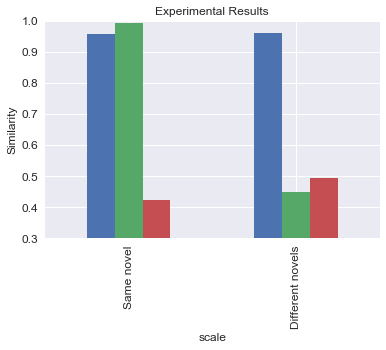

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

#A = 0
#B = 0

#Cosine similarity: specific characters. 
#Same novel: female vs female
A = Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'female', nounphrases))['roberta']
B = Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'female', nounphrases))['bobbie']

#Same novel: female vs male
C = Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'female', nounphrases))['phyllis']
D = Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'male', nounphrases))['peter']

#Same novel: male vs male
E = Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'male', nounphrases))['will atkins']
F = Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'male', nounphrases))['jim']

#Different novel: female vs female
G = Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'female', nounphrases))['roberta']
H = Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'female', nounphrases))['phyllis']

#Different novel: female vs male
I = Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'female', nounphrases))['bobbie']
J = Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'male', nounphrases))['phil']

#Different novel: male vs male
K = Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'male', nounphrases))['atkins']
L = Counter(get_interesting_contexts(novels, target_dependencies, number_of_characters_per_text, 'male', nounphrases))['porter']

def counters_to_feature_lists(counter1,counter2):
    combined = counter1 + counter2 
    list1 = [counter1[key] for key in combined]
    list2 = [counter2[key] for key in combined]
    return list1,list2

L1,L2 = counters_to_feature_lists(A,B)
L3,L4 = counters_to_feature_lists(C,D)
L5,L6 = counters_to_feature_lists(E,F)
L7,L8 = counters_to_feature_lists(G,H)
L9,L10 = counters_to_feature_lists(I,J)
L11, L12 = counters_to_feature_lists(K,L)
#print(L1)
#print(L2)
L1_and_L2 = cosine_similarity([L1], [L2])[0,0]
L3_and_L4 = cosine_similarity([L3], [L4])[0,0]
L5_and_L6 = cosine_similarity([L5], [L6])[0,0]
L7_and_L8 = cosine_similarity([L7], [L8])[0,0]
L9_and_L10 = cosine_similarity([L9], [L10])[0,0]
L11_and_L12 = cosine_similarity([L11], [L12])[0,0]

#list_for_similarities = [L1_and_L2, L3_and_L4, L5_and_L6, L7_and_L8, L9_and_L10, L11_and_L12] 
list_for_similarities = [('Same novel', L1_and_L2, L3_and_L4, L5_and_L6), 
                         ('Different novels', L7_and_L8, L9_and_L10, L11_and_L12)]

df = pd.DataFrame(list_for_similarities)    #Print graphical representation.
ax = df.plot.bar(title="Experimental Results",legend=False,x=0)
ax.set_ylabel("Similarity")
ax.set_xlabel("scale")
ax.set_ylim(0.3,1.0)


From the graph, we can see there is definitely an issue with unbalanced gender sets. For reasons such as incomplete books or lack of reference (a main character is not always referenced by name) and choice of books (In particular 'The Railway Children' and 'Romeo and Juliet') my distribution of male and female characters is male bias. It seems most prosperous novel was 'The Railway Children', while 'Romeo and Juliet' did not provide Juliet as a main character unless characters_per_text was set to above 30 (This then cause problems with the cosine test). This would explain the anomalous 0.45 result for 'different novel: female vs female'.

Lowest results correlate to using different novels, especially when comparing a male to a male and female to male (female to female produced the best results regardless of environment). This would suggest that male characters have more varying features between themselves than compared to a female. This does not seem entirely correct, and would most likely be down to unbalanced distribution of males to females. There were significantly more males being mentioning in the novels, however, the cosine test is only comparing two characters. Logically, this should only have a significant effect in the first method of a collective comparison. A further possibility would involve defected features extracted. The contrast between varied novelist’s attempts to portray a character can vary dramatically in the style. Style is also influenced through time. I have tried to use a span of books from 1597(Romeo and Juliet) to 1971(The Railway Children). Juliet was very badly classified, and so was Romeo. However, all main characters from 'The Railway Children' provided strong feature sets. This would suggest methods of feature extraction like this are best tailored for books published at a similar time.

The blue bar for both same and different weighted the same. This can only be explained by limited female characters, most coming from 'The Railway Children'. This further confirms that characters have a higher transitivity in features when belonging to the same novel. However, this correlation hasn’t


In [ ]:
def get_gendered_pronoun(parsed_novel, nounphrases, nounphrases_female, nounphrases_male):
    
    #Method for extracting female pronoun features.
    def gendered_pronoun_female(np):
        return np.text.strip() in ["she", "her"]    
    #Method for extracting male pronoun features.
    def gendered_pronoun_male(np):
        return np.text.strip() in ["he", "his"]
    #Method for getting nounphrase from noun chunks within parsed novel.
    #Param:  np.
    #return: boolean. 
    def gendered_pronoun(np):
        return np.text.strip() in ["he", "she", "her", "his"]

    text = parsed_novel
    
    nounphrases_male += [[re.sub("\s+"," ",np.text), np.root.head.text] for np in parsed_novel.noun_chunks if gendered_pronoun_male(np)]    
    nounphrases_female += [[re.sub("\s+"," ",np.text), np.root.head.text] for np in parsed_novel.noun_chunks if gendered_pronoun_female(np)]
    return nounphrases_male, nounphrases_female

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

nounphrases = []
nounphrases_male = []
nounphrases_male_count = defaultdict(Counter)
nounphrases_female = []
nounphrases_female_count = defaultdict(Counter)

A, B = Counter(get_gendered_pronoun(parsed_Railway, nounphrases, nounphrases_female, nounphrases_male))
#Counter(get_gendered_pronoun(parsed_Railway, nounphrases, nounphrases_female, nounphrases_male))

for pronoun, verb in A:
    nounphrases_male_count[pronoun][verb] += 1
for pronoun, verb in B:
    nounphrases_female_count[pronoun][verb] += 1
print(nounphrases_female_count)
#A = nounphrases_male_count[pronoun]['he']
#B = nounphrases_male_count[pronoun]['he']

def counters_to_feature_lists(counter1,counter2):
    combined = counter1 + counter2 
    list1 = [counter1[key] for key in combined]
    list2 = [counter2[key] for key in combined]
    return list1,list2

L1,L2 = counters_to_feature_lists(A,B)
print(L1)
print(L2)
cosine_similarity([L1], [L2])[0,0]


TypeError: unhashable type: 'list'